In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(20)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


# Bar Charts

A basic bar chart of frequencies can be created through the use of seaborn's countplot function.

```seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)```

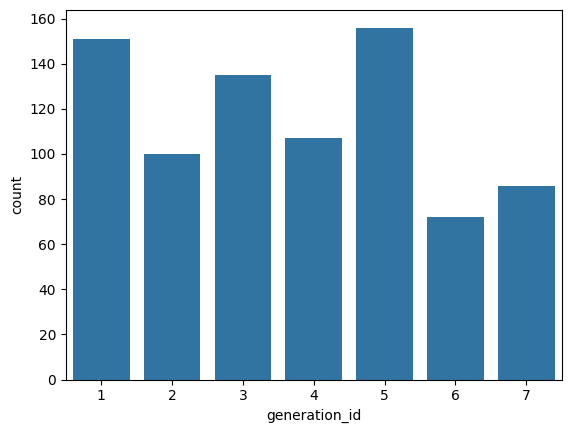

In [3]:
sb.countplot(data=pokemon, x='generation_id');

### Selecting color palette

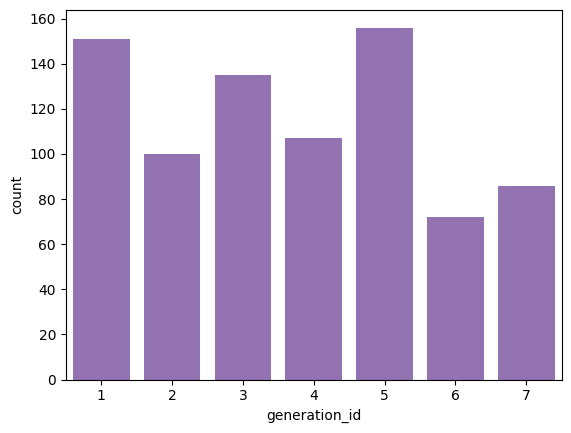

In [4]:
base_color = sb.color_palette()[4]

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color);


### sorting it by order

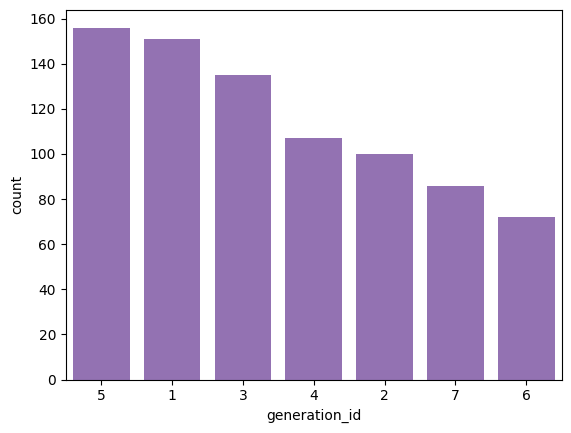

In [5]:

gen_order = pokemon['generation_id'].value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

### Turning the x lable to 90 using xticks 

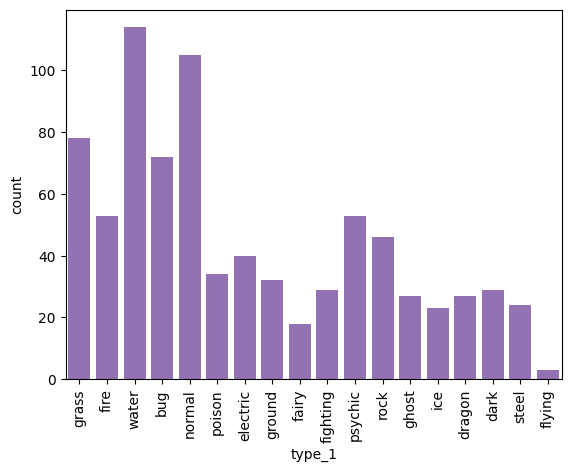

In [6]:

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)

# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1', color=base_color);

### making the horizontal plot by giving y parameter

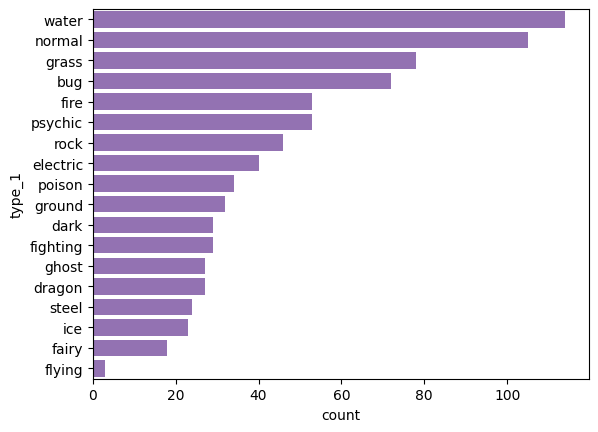

In [7]:
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

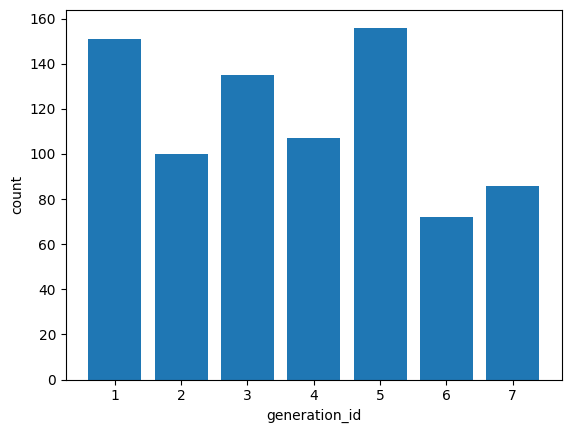

In [8]:
#matplotlib for the same bar chart

# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

In [9]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head(20)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


Text(0.5, 0, 'proportion')

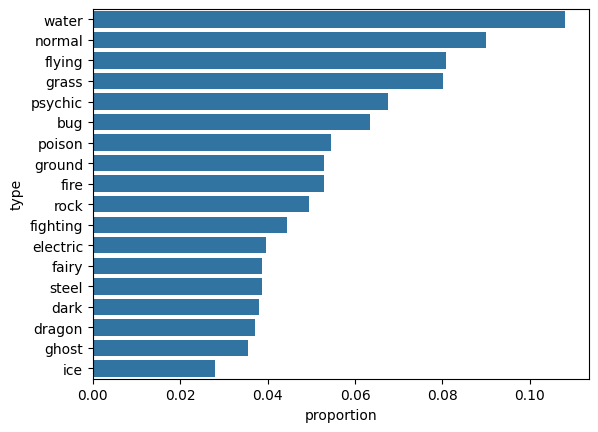

In [10]:
# get order of bars by frequency
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

    # Compute largest proportion
    # Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon

    # establish tick locations and create plot
base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')

In [11]:
# from matplotlib import rcParams
# # Specify the figure size in inches, for both X, and Y axes
# rcParams['figure.figsize'] = 12,4

# Histograms

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

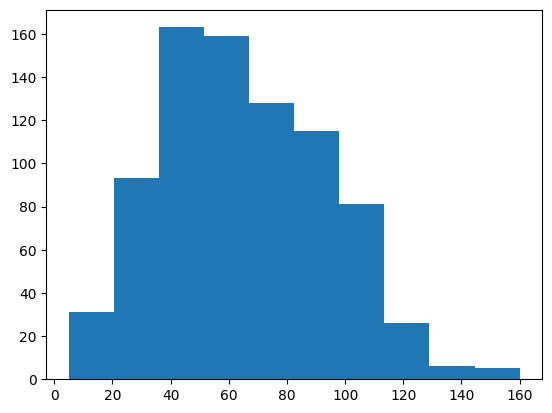

In [14]:
#hisogram using plt

plt.hist(data = pokemon, x = 'speed')

(array([ 18.,  29.,  77., 106.,  95., 121.,  85.,  81.,  77.,  61.,  33.,
         13.,   5.,   2.,   4.]),
 array([  5.        ,  15.33333333,  25.66666667,  36.        ,
         46.33333333,  56.66666667,  67.        ,  77.33333333,
         87.66666667,  98.        , 108.33333333, 118.66666667,
        129.        , 139.33333333, 149.66666667, 160.        ]),
 <BarContainer object of 15 artists>)

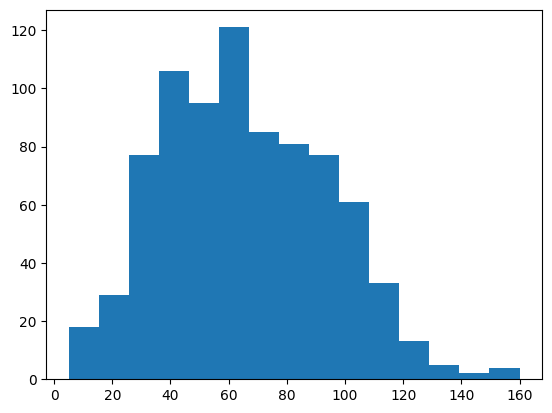

In [16]:
#Histogram with fixed number of bins
plt.hist(data = pokemon, x = 'speed', bins = 15)

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.]),
 <BarContainer object of 32 artists>)

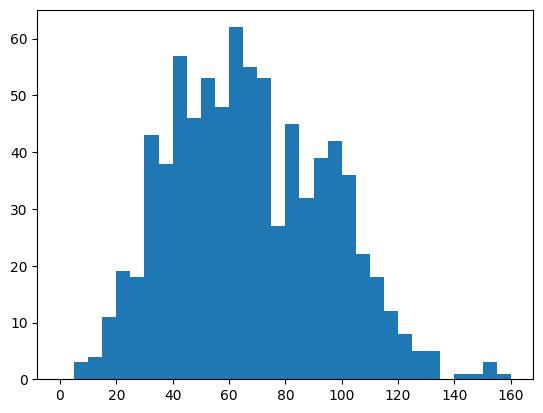

In [32]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins)

<Axes: xlabel='speed', ylabel='Count'>

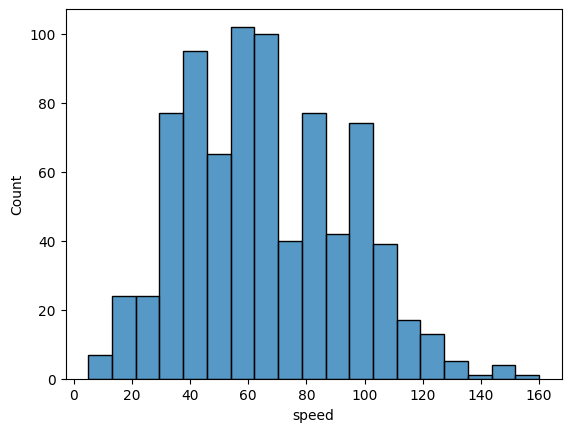

In [23]:
sb.histplot(pokemon['speed'])



### Plotting two figures side by side

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  4.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 10.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  3.,
         0.,  0.,  0., 33.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  5.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 26.,  0.,  0.,
         0.,  6.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,
         1.,  0.,  0.,  0., 36.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  8.,
         0.,  0.,  0.,  8.,  0.,  0.,  0.,  3.,  0.

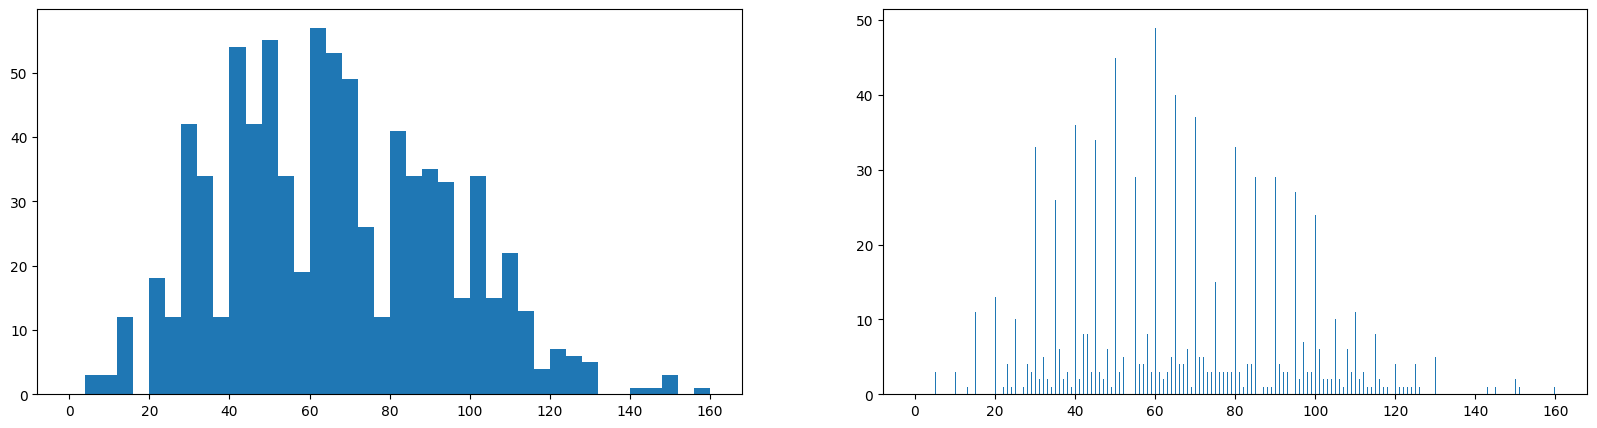

In [34]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins)

### axis limit
In order to change a histogram's axis limits, you can add a Matplotlib xlim() call to your code. The function takes a tuple of two numbers specifying the upper and lower bounds of the x-axis range. See the example below.

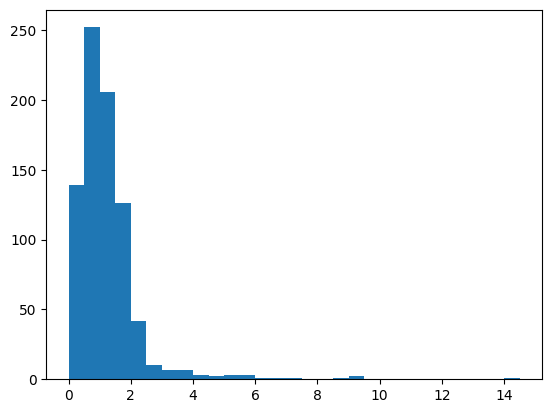

In [36]:
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)

# Plot the histogram for the height column
plt.hist(data=pokemon, x='height', bins=bins);

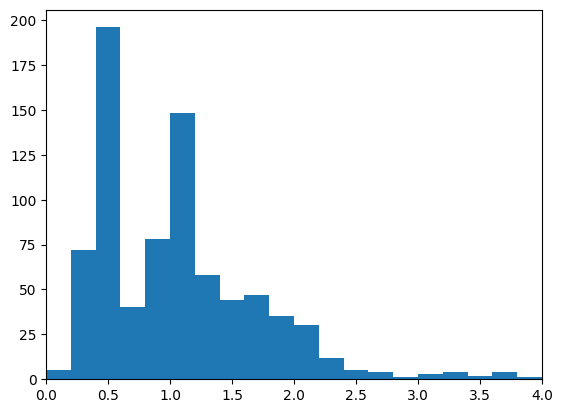

In [41]:
bins = np.arange(0, pokemon['height'].max()+0.5, 0.2)
# Plot the histogram for the height column
plt.hist(data=pokemon, x='height', bins=bins);

# Set the upper and lower bounds of the bins that are displayed in the plot
# Refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,4));

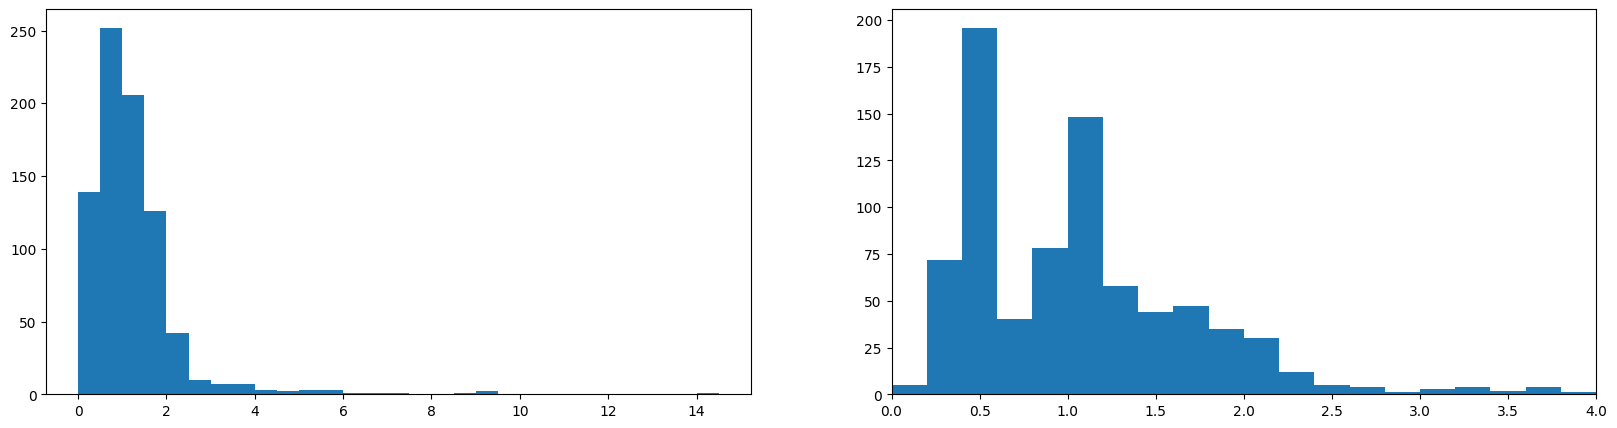

In [42]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)

# Plot the histogram for the height column
plt.hist(data=pokemon, x='height', bins=bins);


plt.subplot(1, 2, 2) 

bins = np.arange(0, pokemon['height'].max()+0.5, 0.2)
# Plot the histogram for the height column
plt.hist(data=pokemon, x='height', bins=bins);
plt.xlim((0,4));

In [45]:
def scales_solution_1():
    """
    Solution for Question 1 in scales and transformation practice: create a
    histogram of Pokemon heights.
    """
    sol_string = ["There's a very long tail of Pokemon heights. Here, I've",
                  "focused in on Pokemon of height 6 meters or less, so that I",
                  "can use a smaller bin size to get a more detailed look at",
                  "the main data distribution."]
    print((" ").join(sol_string))

    # data setup


    bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
    plt.hist(data = pokemon, x = 'height', bins = bins)
    plt.xlim((0,6))


def scales_solution_2():
    """
    Solution for Question 2 in scales and transformation practice: create a
    histogram of Pokemon weights.
    """
    sol_string = ["Since Pokemon weights are so skewed, I used a log transformation",
                  "on the x-axis. Bin edges are in increments of 0.1 powers of ten,",
                  "with custom tick marks to demonstrate the log scaling."]
    print((" ").join(sol_string))

    # data setup
   

    bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
    ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
    labels = ['{}'.format(val) for val in ticks]

    plt.hist(data = pokemon, x = 'weight', bins = bins)
    plt.xscale('log')
    plt.xticks(ticks, labels)
    plt.xlabel('Weight (kg)')


There's a very long tail of Pokemon heights. Here, I've focused in on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.


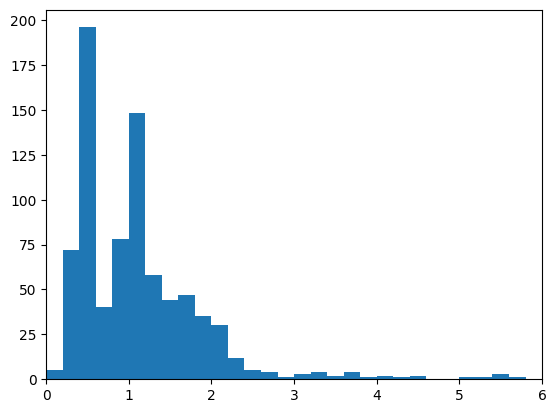

In [46]:
scales_solution_1()

Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.


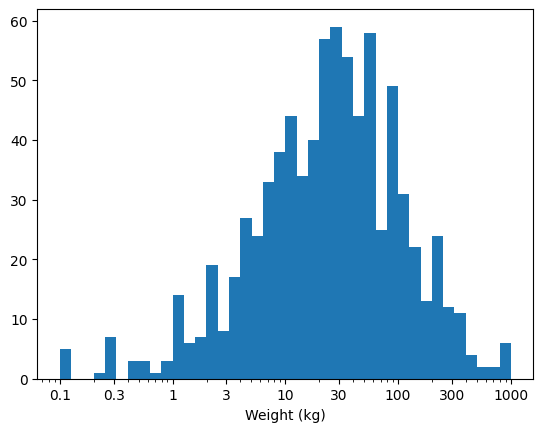

In [48]:
scales_solution_2()

## Glossary

**Univariate visualizations** : Visualize single-variables, such as bar charts, histograms, and line charts.

**Bivariate visualizations**: Plots representing the relationship between two variables measured on the given sample data. These plots help to identify the relationship pattern between the two variables.

**Ordinal data**: It is a categorical data type where the variables have natural and ordered categories. The distances between the categories are unknown, such as the survey options presented on a five-point scale.